In [165]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from pathlib import Path
import os


import statsmodels.api as sm
import statsmodels
import lightgbm as lgb

main_directory = Path.cwd().parent.as_posix()

In [166]:
df = pd.read_csv(f"{main_directory}/databases/zoopla_data.csv")
#df = pd.get_dummies(df, columns = ['type'], drop_first = True, prefix = 'type')
#df = pd.get_dummies(df, columns = ['location'], drop_first = True, prefix = 'location')
df

,type,price,station,beds,baths,receptions,post_code,location,avg_sold_price_12months
0,flat,369950.0,0.5,1,1,0.0,M15,manchester,200730.0
1,flat,369950.0,0.5,1,1,0.0,M15,manchester,200730.0
2,flat,154950.0,0.5,2,1,1.0,M15,manchester,200730.0
3,flat,541805.0,0.2,3,1,1.0,M15,manchester,200730.0
4,flat,240327.0,0.2,1,1,1.0,M15,manchester,200730.0
...,...,...,...,...,...,...,...,...,...
4402,detached,625000.0,0.7,3,2,3.0,M34,manchester,193433.0
4403,semi-detached,230000.0,0.7,3,1,2.0,M34,manchester,193433.0
4404,semi-detached,310000.0,0.6,4,1,0.0,M34,manchester,193433.0
4405,terraced,130000.0,0.2,3,1,1.0,M34,manchester,193433.0


In [167]:
categorical_columns = ['type','post_code','location']
category_ids = [df.columns.get_loc(col) for col in categorical_columns]
category_ids

for column in categorical_columns:
    df[column] = pd.Categorical(df[column])

In [168]:
x = df.drop(['price'],axis=1)
y = df.price

In [169]:
from sklearn.model_selection import train_test_split
from sklearn import metrics

x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.2,random_state=42)



In [170]:
model = lgb.LGBMRegressor(learning_rate=0.03,max_depth=4,random_state=42,num_iterations=50000)
model.fit(x_train,y_train,eval_set=[(x_test,y_test),(x_train,y_train)],eval_metric='mape',verbose=50,early_stopping_rounds=100,categorical_feature=category_ids,metrics=['mape'])

/home/tymo/Desktop/ZooplaScrape/datascience/lib/python3.9/site-packages/lightgbm/sklearn.py:726: UserWarning: 'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. Pass 'early_stopping()' callback via 'callbacks' argument instead.
  _log_warning("'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. "
/home/tymo/Desktop/ZooplaScrape/datascience/lib/python3.9/site-packages/lightgbm/sklearn.py:736: UserWarning: 'verbose' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.
  _log_warning("'verbose' argument is deprecated and will be removed in a future release of LightGBM. "
/home/tymo/Desktop/ZooplaScrape/datascience/lib/python3.9/site-packages/lightgbm/engine.py:177: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  _log_warning(f"Found `{alias}` in params. Will use it instead

[LightGBM] [Warning] Met categorical feature which contains sparse values. Consider renumbering to consecutive integers started from zero
[50]	training's mape: 0.264262	training's l2: 8.50767e+09	valid_0's mape: 0.287173	valid_0's l2: 8.44492e+09
[100]	training's mape: 0.22591	training's l2: 6.8138e+09	valid_0's mape: 0.252951	valid_0's l2: 7.03567e+09
[150]	training's mape: 0.213556	training's l2: 6.2336e+09	valid_0's mape: 0.242064	valid_0's l2: 6.73073e+09
[200]	training's mape: 0.206976	training's l2: 5.94917e+09	valid_0's mape: 0.236626	valid_0's l2: 6.6093e+09
[250]	training's mape: 0.201443	training's l2: 5.75641e+09	valid_0's mape: 0.232119	valid_0's l2: 6.55813e+09
[300]	training's mape: 0.197635	training's l2: 5.61846e+09	valid_0's mape: 0.22903	valid_0's l2: 6.52758e+09
[350]	training's mape: 0.195305	training's l2: 5.49544e+09	valid_0's mape: 0.227665	valid_0's l2: 6.51151e+09
[400]	training's mape: 0.193398	training's l2: 5.4026e+09	valid_0's mape: 0.226714	valid_0's l2: 6

LGBMRegressor(learning_rate=0.03, max_depth=4, num_iterations=50000,
              random_state=42)

<AxesSubplot:title={'center':'Feature importance'}, xlabel='Feature importance', ylabel='Features'>

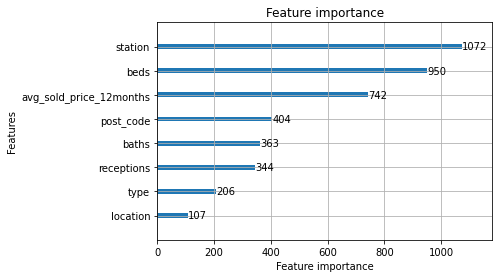

In [171]:
lgb.plot_importance(model)